In [96]:
#make the imports 
import tensorflow as tf
import urllib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### download dataset

In [3]:
url = 'https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset/download?datasetVersionNumber=1'
urllib.request.urlretrieve(url, filename="london_bike_sharing.csv")

('london_bike_sharing.csv', <http.client.HTTPMessage at 0x1a0eb883dc0>)

In [11]:
df = pd.read_csv("london_merged.csv",parse_dates=['timestamp'], index_col="timestamp")
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


In [12]:
df["hour"] = df.index.hour
df["day_of_week"] = df.index.day_of_week
df["day_of_month"] = df.index.day
df["month"] = df.index.month

In [13]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,4,1


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

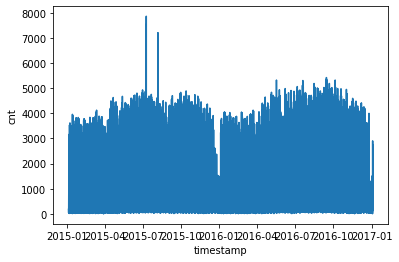

In [15]:
sns.lineplot(x=df.index, y='cnt', data=df)

In [19]:
df_by_month = df.resample('M').sum()
df_by_month.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-31,546639,4101.0,2255.5,51005.00,12502.00,2211.0,0.0,192.0,2013.0,7709,2014,11753,671
2015-02-28,543594,3721.5,1868.0,51950.00,9873.50,2409.0,0.0,192.0,2013.0,7707,2015,9734,1342
2015-03-31,695934,6093.5,4558.5,51832.25,12938.25,1940.0,0.0,215.0,0.0,8540,2174,11751,2217
2015-04-30,831582,7873.0,7112.5,48468.00,10988.50,1642.0,48.0,191.0,0.0,8270,2131,11156,2876
2015-05-31,895413,10091.5,9803.5,47939.00,14268.50,1900.0,48.0,240.0,0.0,8556,2376,11904,3720


<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

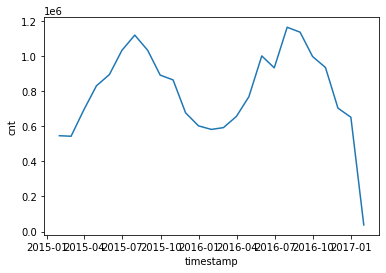

In [21]:
sns.lineplot(x=df_by_month.index, y='cnt', data=df_by_month)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

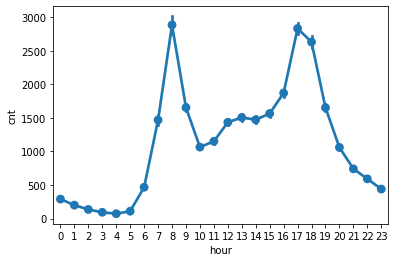

In [23]:
sns.pointplot(x=df.hour, y='cnt', data=df)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

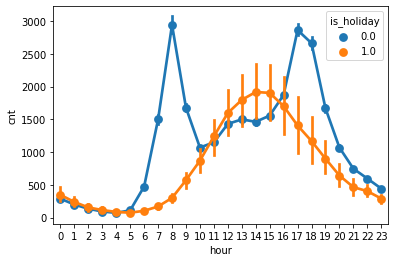

In [27]:
sns.pointplot(x=df.hour, y='cnt', data=df, hue="is_holiday")

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

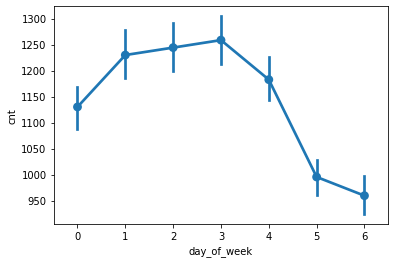

In [32]:
sns.pointplot(x=df.day_of_week, y='cnt', data=df)

In [56]:
cnt = pd.DataFrame(df["cnt"])
cnt

,cnt
timestamp,
2015-01-04 00:00:00,182
2015-01-04 01:00:00,138
2015-01-04 02:00:00,134
2015-01-04 03:00:00,72
2015-01-04 04:00:00,47
...,...
2017-01-03 19:00:00,1042
2017-01-03 20:00:00,541
2017-01-03 21:00:00,337


Text(0, 0.5, 'timestamp')

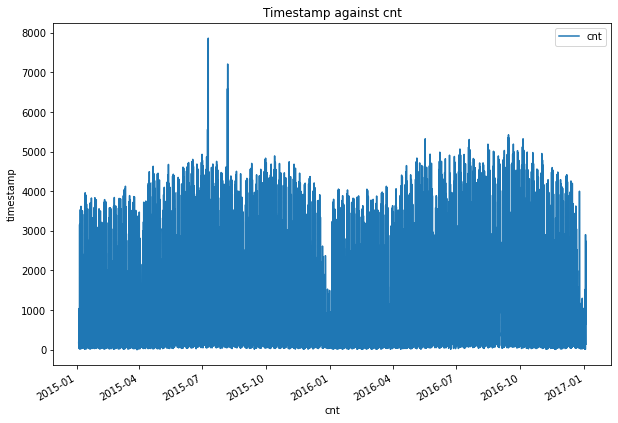

In [57]:
cnt.plot(figsize=(10,7))
plt.title("Timestamp against cnt")
plt.xlabel("cnt")

plt.ylabel("timestamp")

Text(0, 0.5, 'timestamp')

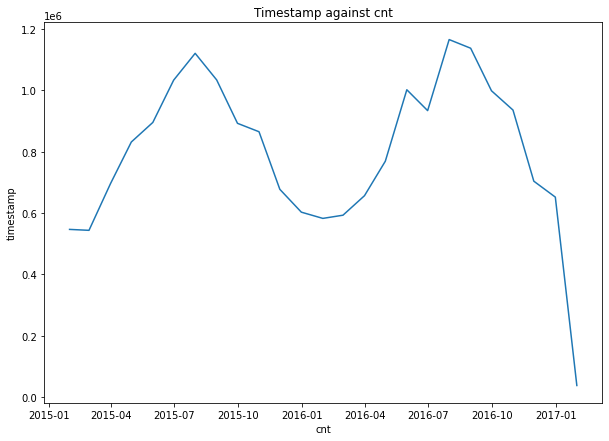

In [59]:
plt.figure(figsize=(10, 7))
plt.plot(df_by_month["cnt"])
plt.title("Timestamp against cnt by month")
plt.xlabel("cnt")
plt.ylabel("timestamp")

In [82]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
train.shape, test.shape

((15672, 13), (1742, 13))

In [93]:
from sklearn.preprocessing import RobustScaler

f_columns = ['t1', 't2', 'hum', 'wind_speed']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['cnt']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['cnt'] = cnt_transformer.transform(train[['cnt']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['cnt'] = cnt_transformer.transform(test[['cnt']])


C:\Users\nmuchelemba\AppData\Local\Temp\ipykernel_38692\3974383696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
C:\Users\nmuchelemba\AppData\Local\Temp\ipykernel_38692\3974383696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cnt'] = cnt_transformer.transform(train[['cnt']])
C:\Users\nmuchelemba\AppData\Local\Temp\ipykernel_38692\3974383696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [90]:
# Plot correctly made splits
# plt.figure(figsize=(10, 7))
# plt.scatter(X_train, y_train, s=5, label="Train data")
# plt.scatter(X_test, y_test, s=5, label="Test data")
# plt.xlabel("Date")
# plt.ylabel("BTC Price")
# plt.legend(fontsize=14)
# plt.show();

In [94]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [97]:
time_steps = 10
# reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.cnt, time_steps)
X_test, y_test = create_dataset(test, test.cnt, time_steps)
print(X_train.shape, y_train.shape)

(15662, 10, 13) (15662,)


In [105]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_of_month,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0,0,6,4,1
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0,1,6,4,1
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0,2,6,4,1
2015-01-04 03:00:00,-0.540634,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0,3,6,4,1
2015-01-04 04:00:00,-0.557851,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0,4,6,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.440771,-0.6250,-0.571429,0.825,-0.818182,2.0,0.0,1.0,2.0,3,6,23,10
2016-10-23 04:00:00,-0.486915,-0.6250,-0.571429,0.975,-0.818182,2.0,0.0,1.0,2.0,4,6,23,10
2016-10-23 05:00:00,-0.516529,-0.6250,-0.476190,0.675,-1.000000,3.0,0.0,1.0,2.0,5,6,23,10


In [107]:
from tensorflow import keras
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [108]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
441/441 [==============================] - 6s 7ms/step - loss: 0.2679 - val_loss: 0.1644
Epoch 2/30
441/441 [==============================] - 3s 6ms/step - loss: 0.0866 - val_loss: 0.0653
Epoch 3/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0476 - val_loss: 0.0504
Epoch 4/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0364 - val_loss: 0.0444
Epoch 5/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0323 - val_loss: 0.0425
Epoch 6/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0274 - val_loss: 0.0353
Epoch 7/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0252 - val_loss: 0.0376
Epoch 8/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0234 - val_loss: 0.0366
Epoch 9/30
441/441 [==============================] - 4s 9ms/step - loss: 0.0219 - val_loss: 0.0352
Epoch 10/30
441/441 [==============================] - 4s 10ms/step - loss: 0.0218 - val_loss: 0.02

In [109]:
y_pred = model.predict(X_test)

55/55 [==============================] - 1s 2ms/step


In [110]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

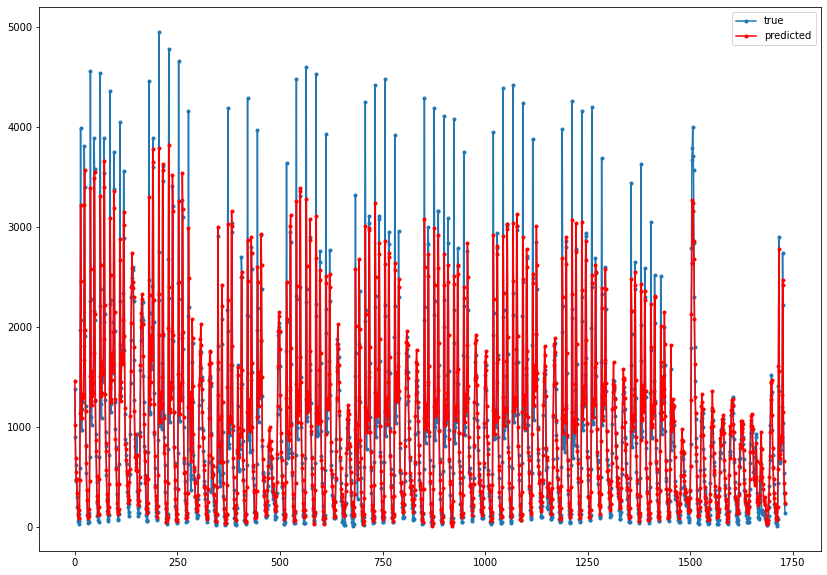

In [117]:
plt.figure(figsize=(14,10))
plt.plot(y_test_inv.flatten(), marker='.', label='true')
plt.plot(y_pred_inv.flatten(),'r',marker='.', label='predicted')
plt.legend()

## Dense (multivariate time series)

In [130]:
bike_sharing_df = df[["cnt","t1","t1"]]
bike_sharing_df.head()

,cnt,t1,t1
timestamp,,,
2015-01-04 00:00:00,182,-1.2500,-1.2500
2015-01-04 01:00:00,138,-1.2500,-1.2500
2015-01-04 02:00:00,134,-1.3125,-1.3125
2015-01-04 03:00:00,72,-1.3750,-1.3750
2015-01-04 04:00:00,47,-1.3750,-1.3750


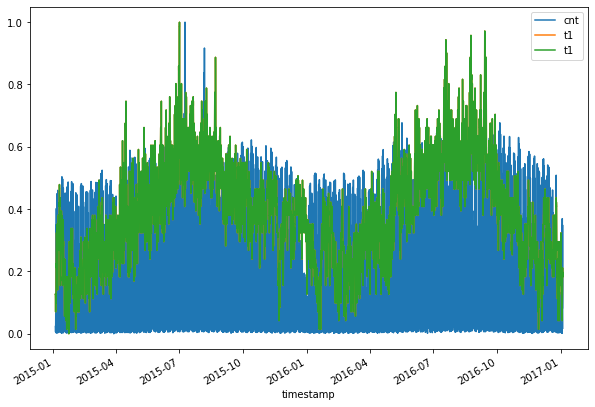

In [132]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_bike_sharing_df = pd.DataFrame(minmax_scale(bike_sharing_df[["cnt","t1"]]), # we need to scale the data first
                                     columns=bike_sharing_df.columns,
                                     index=bike_sharing_df.index)
scaled_bike_sharing_df.plot(figsize=(10, 7));

In [133]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [134]:
# Make a copy of the Bitcoin historical data with block reward feature
bike_sharing_windowed = bike_sharing_df.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bike_sharing_windowed[f"cnt+{i+1}"] = bike_sharing_windowed["cnt"].shift(periods=i+1)
bike_sharing_windowed.head(10)

,cnt,t1,t1,cnt+1,cnt+2,cnt+3,cnt+4,cnt+5,cnt+6,cnt+7
timestamp,,,,,,,,,,
2015-01-04 00:00:00,182,-1.2500,-1.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04 01:00:00,138,-1.2500,-1.2500,182.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04 02:00:00,134,-1.3125,-1.3125,138.0,182.0,NaN,NaN,NaN,NaN,NaN
2015-01-04 03:00:00,72,-1.3750,-1.3750,134.0,138.0,182.0,NaN,NaN,NaN,NaN
2015-01-04 04:00:00,47,-1.3750,-1.3750,72.0,134.0,138.0,182.0,NaN,NaN,NaN
2015-01-04 05:00:00,46,-1.3750,-1.3750,47.0,72.0,134.0,138.0,182.0,NaN,NaN
2015-01-04 06:00:00,51,-1.5000,-1.5000,46.0,47.0,72.0,134.0,138.0,182.0,NaN
2015-01-04 07:00:00,75,-1.5000,-1.5000,51.0,46.0,47.0,72.0,134.0,138.0,182.0
2015-01-04 08:00:00,131,-1.4375,-1.4375,75.0,51.0,46.0,47.0,72.0,134.0,138.0


In [135]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bike_sharing_windowed.dropna().drop("cnt", axis=1).astype(np.float32) 
y = bike_sharing_windowed.dropna()["cnt"].astype(np.float32)
X.head()

,t1,t1,cnt+1,cnt+2,cnt+3,cnt+4,cnt+5,cnt+6,cnt+7
timestamp,,,,,,,,,
2015-01-04 07:00:00,-1.5000,-1.5000,51.0,46.0,47.0,72.0,134.0,138.0,182.0
2015-01-04 08:00:00,-1.4375,-1.4375,75.0,51.0,46.0,47.0,72.0,134.0,138.0
2015-01-04 09:00:00,-1.3750,-1.3750,131.0,75.0,51.0,46.0,47.0,72.0,134.0
2015-01-04 10:00:00,-1.2500,-1.2500,301.0,131.0,75.0,51.0,46.0,47.0,72.0
2015-01-04 11:00:00,-1.3750,-1.3750,528.0,301.0,131.0,75.0,51.0,46.0,47.0


In [136]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(13925, 13925, 3482, 3482)

In [139]:
from tensorflow.keras import layers
tf.random.set_seed(42)

# Make multivariate time series model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
history_model_2 = model_2.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
#             verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test)
           )

Epoch 1/100
109/109 [==============================] - 0s 2ms/step - loss: 482.9199 - val_loss: 351.1488
Epoch 2/100
109/109 [==============================] - 0s 1ms/step - loss: 323.4750 - val_loss: 321.9412
Epoch 3/100
109/109 [==============================] - 0s 974us/step - loss: 304.5161 - val_loss: 307.1777
Epoch 4/100
109/109 [==============================] - 0s 946us/step - loss: 289.3529 - val_loss: 294.9720
Epoch 5/100
109/109 [==============================] - 0s 958us/step - loss: 275.6730 - val_loss: 277.1438
Epoch 6/100
109/109 [==============================] - 0s 1ms/step - loss: 263.8595 - val_loss: 264.4073
Epoch 7/100
109/109 [==============================] - 0s 1ms/step - loss: 253.1924 - val_loss: 255.0767
Epoch 8/100
109/109 [==============================] - 0s 1ms/step - loss: 243.4881 - val_loss: 243.9409
Epoch 9/100
109/109 [==============================] - 0s 999us/step - loss: 235.2124 - val_loss: 234.3422
Epoch 10/100
109/109 [=========================

109/109 [==============================] - 0s 943us/step - loss: 129.2333 - val_loss: 129.0391
Epoch 78/100
109/109 [==============================] - 0s 945us/step - loss: 130.1235 - val_loss: 129.1486
Epoch 79/100
109/109 [==============================] - 0s 917us/step - loss: 130.0530 - val_loss: 124.6399
Epoch 80/100
109/109 [==============================] - 0s 966us/step - loss: 128.8046 - val_loss: 123.6133
Epoch 81/100
109/109 [==============================] - 0s 956us/step - loss: 129.5886 - val_loss: 125.1203
Epoch 82/100
109/109 [==============================] - 0s 992us/step - loss: 128.8445 - val_loss: 124.3425
Epoch 83/100
109/109 [==============================] - 0s 929us/step - loss: 129.1550 - val_loss: 123.5839
Epoch 84/100
109/109 [==============================] - 0s 989us/step - loss: 127.8723 - val_loss: 123.1614
Epoch 85/100
109/109 [==============================] - 0s 963us/step - loss: 128.6735 - val_loss: 127.7974
Epoch 86/100
109/109 [===================

In [140]:
model_2.evaluate(X_test, y_test)

109/109 [==============================] - 0s 683us/step - loss: 122.3072


122.30716705322266

In [141]:
# Make predictions on multivariate data
model_2_preds = tf.squeeze(model_2.predict(X_test))
model_2_preds[:10]

109/109 [==============================] - 0s 525us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([  11.079883,  153.27249 ,  604.2575  , 2734.9368  , 3681.2502  ,
       2222.5027  , 1079.7762  , 1167.9357  , 1546.0114  , 1551.9476  ],
      dtype=float32)>

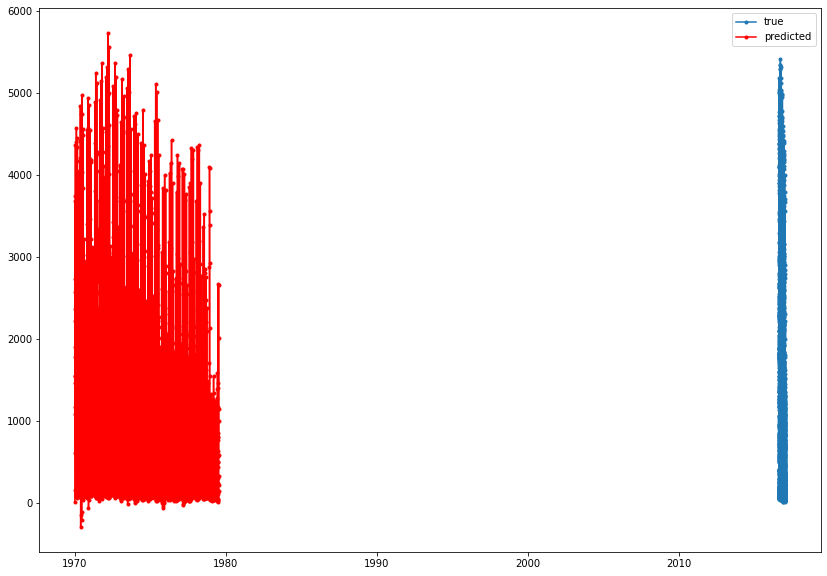

In [155]:
plt.figure(figsize=(14,10))
plt.plot(y_test, marker='.', label='true')
plt.plot(model_2_preds,'r',marker='.', label='predicted')
plt.legend()

In [156]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
#   mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()

         }

In [154]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_2_preds)
model_3_results

{'mae': 122.30714, 'mse': 44528.914, 'rmse': 211.01875, 'mape': 17.993822}